# 1. 데이터 준비

In [1]:
# 데이터 로드 및 준비
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv("C:/Users/tksmd/DSA_features.csv")

# lying 데이터를 정상 데이터로, 다른 activity 데이터를 비정상 데이터로 설정
lying_data = data[data['activity'].isin(['lyingRigh', 'lyingBack'])]
other_activity_data = data[data['activity'] == 'walking']  # 예를 들어 'walking'을 비정상 데이터로 설정

# 피처와 레이블 분리
X_lying = lying_data.drop(['activity', 'people'], axis=1).values
X_other_activity = other_activity_data.drop(['activity', 'people'], axis=1).values


# 2. 대칭형 Autoencoder 구현 및 시각화

Epoch 1/50


C:\Users\tksmd\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5.5900 - val_loss: 5.4212
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0937 - val_loss: 5.0862
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8890 - val_loss: 5.0476
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8203 - val_loss: 5.0291
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8048 - val_loss: 5.0190
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7813 - val_loss: 5.0145
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8235 - val_loss: 5.0109
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7872 - val_loss: 5.0082
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8053 - val_loss: 5.0070
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7889 - val_loss: 5.0064
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8677 - val_loss: 5.0060
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8033 - val_loss: 5.0055

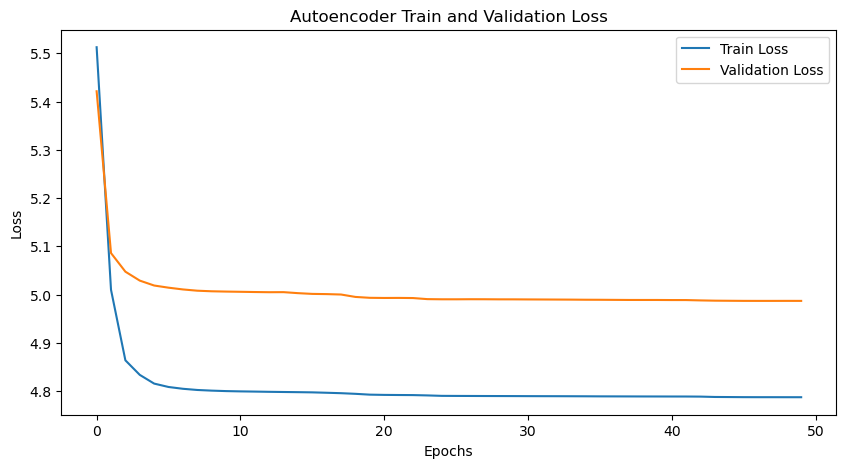

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


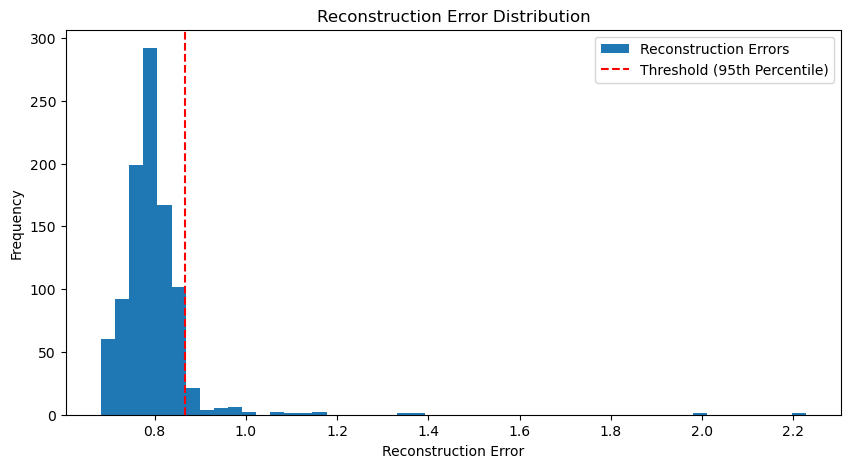

Accuracy (대칭형 Autoencoder): 0.9500


In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# 2. Autoencoder 학습 데이터 준비
X_train, X_test = train_test_split(X_lying, test_size=0.2, random_state=2024)

# 데이터 타입을 float으로 변환
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 3. 대칭형 Autoencoder 모델 구축
autoencoder = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(X_train.shape[1], activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mse')

# 4. Autoencoder 학습
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

# 5. 학습 과정 시각화
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 6. 재구성 오류 계산
combined_data = np.vstack((X_lying, X_other_activity))
combined_data = combined_data.astype('float32')  # 데이터 타입 변환
reconstructions = autoencoder.predict(combined_data)
reconstruction_errors = np.mean(np.abs(reconstructions - combined_data), axis=1)

# 7. 재구성 오류 시각화
plt.figure(figsize=(10, 5))
plt.hist(reconstruction_errors, bins=50, label='Reconstruction Errors')
plt.axvline(x=np.percentile(reconstruction_errors, 95), color='r', linestyle='--', label='Threshold (95th Percentile)')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 8. Threshold 설정 및 분류
threshold = np.percentile(reconstruction_errors, 95)  # 상위 95% 기준 설정
predicted_labels = reconstruction_errors > threshold

# 9. accuracy 계산
true_labels = np.hstack([np.zeros(len(X_lying)), np.ones(len(X_other_activity))])  # 정상은 0, 비정상은 1
accuracy = np.mean(predicted_labels == true_labels)

print(f"Accuracy (대칭형 Autoencoder): {accuracy:.4f}")


# 3. 비대칭형 Autoencoder 구현 및 시각화

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5.6454 - val_loss: 5.4854
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.1953 - val_loss: 5.1737
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9648 - val_loss: 5.1067
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8807 - val_loss: 5.0925
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8867 - val_loss: 5.0825
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8841 - val_loss: 5.0752
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8693 - val_loss: 5.0714
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9052 - val_loss: 5.0633
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9134 - val_loss: 5.0601
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8471 - val_loss: 5.0566
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8575 - val_loss: 5.0553
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8549 - val_l

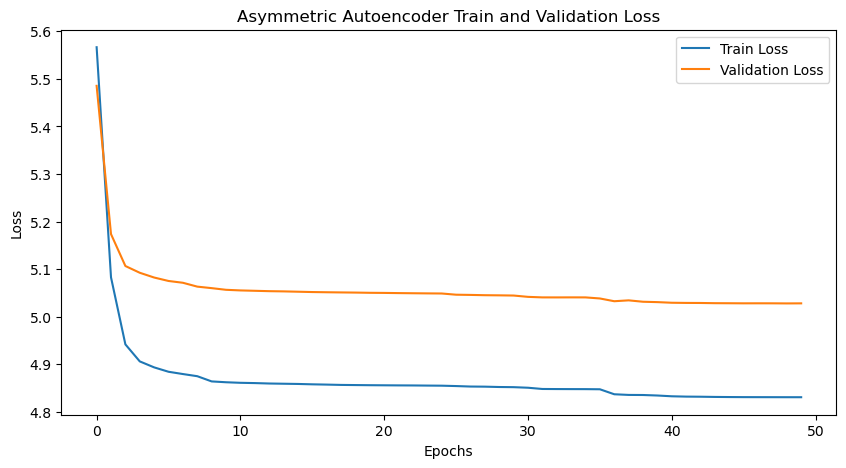

In [3]:
# 비대칭형 Autoencoder 모델 구축
asymmetric_autoencoder = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),  # 비대칭 구조
    Dense(32, activation='relu'),
    Dense(X_train.shape[1], activation='sigmoid')
])

asymmetric_autoencoder.compile(optimizer='adam', loss='mse')

# 비대칭형 Autoencoder 학습
asymmetric_history = asymmetric_autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

# 학습 과정 시각화
plt.figure(figsize=(10, 5))
plt.plot(asymmetric_history.history['loss'], label='Train Loss')
plt.plot(asymmetric_history.history['val_loss'], label='Validation Loss')
plt.title('Asymmetric Autoencoder Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 재구성 오류 및 성능 평가 (위와 동일한 방식)


# 4. Denoising Autoencoder (DAE) 구현 및 시각화

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 5.6400 - val_loss: 5.5057
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2240 - val_loss: 5.2393
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0321 - val_loss: 5.1685
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9416 - val_loss: 5.1291
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9597 - val_loss: 5.1151
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9214 - val_loss: 5.1123
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8964 - val_loss: 5.1121
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9415 - val_loss: 5.1116
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8804 - val_loss: 5.1111
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9340 - val_loss: 5.1109
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8948 - val_loss: 5.1119
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8802 - val_lo

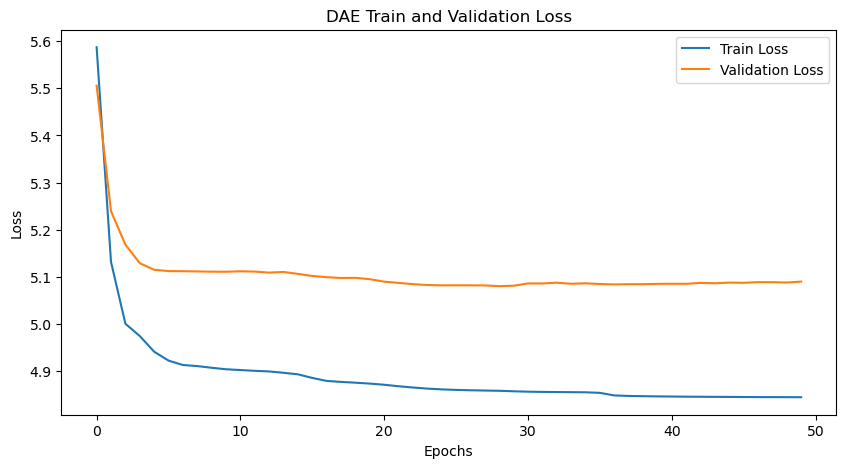

In [4]:
# 노이즈 추가
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)

dae_autoencoder = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(X_train.shape[1], activation='sigmoid')
])

dae_autoencoder.compile(optimizer='adam', loss='mse')

# DAE 학습
dae_history = dae_autoencoder.fit(X_train_noisy, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

# 학습 과정 시각화
plt.figure(figsize=(10, 5))
plt.plot(dae_history.history['loss'], label='Train Loss')
plt.plot(dae_history.history['val_loss'], label='Validation Loss')
plt.title('DAE Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 재구성 오류 및 성능 평가 (위와 동일한 방식)
